# **The goal here is to test the written loader, preprocessor and visualizer functions**
# Loaders
* text data loader
* pre trained word embedding loader

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
# !pip install lazypredict

In [ ]:
# # navigate to root directory of current file in order to access other files relatively
# %cd /content/drive/MyDrive/Colab\ Notebooks/project-seraphim/server-side/modelling

/content/drive/MyDrive/Colab Notebooks/project-seraphim/server-side/modelling


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import lazypredict
from sklearn.model_selection import train_test_split

import chardet

from utilities.loaders import \
    load_corpus, \
    get_chars, \
    load_lookup_array, \
    save_lookup_array, \
    load_meta_data, \
    save_meta_data, \
    construct_embedding_dict, \
    construct_embedding_matrix, \
    get_cat_cols \

from utilities.preprocessors import \
    map_value_to_index, \
    remove_contractions, \
    rem_non_alpha_num, \
    capitalize, \
    filter_valid, \
    partition_corpus, \
    rem_stop_words, \
    stem_corpus_words, \
    lemmatize_corpus_words, \
    string_list_to_list, \
    flatten_series_of_lists, \
    sentences_to_avgs, \
    normalize_ratings, \
    normalize_rating_matrix, \
    normalize_train_cross, \
    encode_features

from utilities.visualizers import \
    plot_train_cross_features, \
    analyze, \
    view_words, \
    data_split_metric_values, \
    view_value_frequency, \
    multi_class_heatmap, \
    view_metric_values, \
    view_classified_labels, \
    view_label_freq, \
    disp_cat_feat, \
    describe_col, \
    visualize_graph, \
    plot_evolution, \
    view_clusters_3d, \
    ModelResults \
    

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading different datasets as different test cases for loader, preprocessor, and visualizer functions

In [19]:
cal_housing = pd.read_csv('./data/cal_housing.data', sep=',', header=None)

# preprocessing X and Y data
ch_X, ch_Y = cal_housing.loc[:, 0:7].to_numpy(), cal_housing.loc[:, 8].to_numpy()
ch_X_trains, ch_X_cross, ch_Y_trains, ch_Y_cross = train_test_split(ch_X, ch_Y, test_size=0.3, random_state=0)
ch_X_trains, ch_X_cross = normalize_train_cross(ch_X_trains, ch_X_cross)

In [20]:
ch_X

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  3.2200e+02,
         1.2600e+02,  8.3252e+00],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  2.4010e+03,
         1.1380e+03,  8.3014e+00],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  4.9600e+02,
         1.7700e+02,  7.2574e+00],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  1.0070e+03,
         4.3300e+02,  1.7000e+00],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  7.4100e+02,
         3.4900e+02,  1.8672e+00],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  1.3870e+03,
         5.3000e+02,  2.3886e+00]])

In [21]:
with open('./data/laptop_price.csv', 'rb') as file:
  result = chardet.detect(file.read())
result['encoding']

'ISO-8859-1'

In [22]:
laptop_price = pd.read_csv('./data/laptop_price.csv', index_col=0, encoding='ISO-8859-1')

# laptop_price.columns != "Price_euros"
lp_X, lp_Y = laptop_price.loc[:, laptop_price.columns != 'Price_euros'], laptop_price['Price_euros']
lp_X.reset_index(drop=True, inplace=True)
lp_X

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg


In [25]:
cat_cols = get_cat_cols(lp_X)
cat_cols

['Memory',
 'Ram',
 'Weight',
 'OpSys',
 'Product',
 'Cpu',
 'ScreenResolution',
 'Company',
 'Gpu',
 'TypeName']

# Visualizing

['#EC4D08', '#05204E', '#7CD5BF', '#01843C', '#9C63E5', '#B9ED6C', '#8C5359', '#2EA76D', '#84777B', '#23A775', '#2BF9D7', '#69D3BF', '#A3F08A', '#C01CF2', '#1D6F80', '#5385ED', '#2E7082', '#1B5882', '#5C606B', '#387E9E', '#AF327F', '#0FA651', '#5ADADE', '#693CF5', '#B855F3', '#A17EDD', '#131F83', '#708E3C', '#977439', '#679C99', '#9E564A', '#A185ED', '#C79CEA', '#27FCC6', '#72264F', '#D204AF', '#AD9DB6', '#6A0249', '#EE5DCA'] 39
<BarContainer object of 39 artists>
Memory
['#7EA851', '#0EE97B', '#A8A9A0', '#B41FF2', '#F045A9', '#75D81D', '#D3BCAA', '#516EB9', '#8C937D'] 9
<BarContainer object of 9 artists>
Ram
['#9D4263', '#13AD34', '#9557B1', '#F7625C', '#EFB875', '#930C3A', '#B1829F', '#EA1002', '#443D9D', '#9308AA', '#02964C', '#D8BA82', '#4DE2C2', '#36DA73', '#8EC56D', '#C6BD30', '#7ADA61', '#8858BD', '#4C44E9', '#318D41', '#9A8CAF', '#5F4204', '#73BE90', '#175578', '#DB9E41', '#B17EA0', '#49907B', '#00EE2F', '#0DB02C', '#F74DCC', '#395EA1', '#0967A7', '#F207BD', '#DA1ECD', '#A7019E

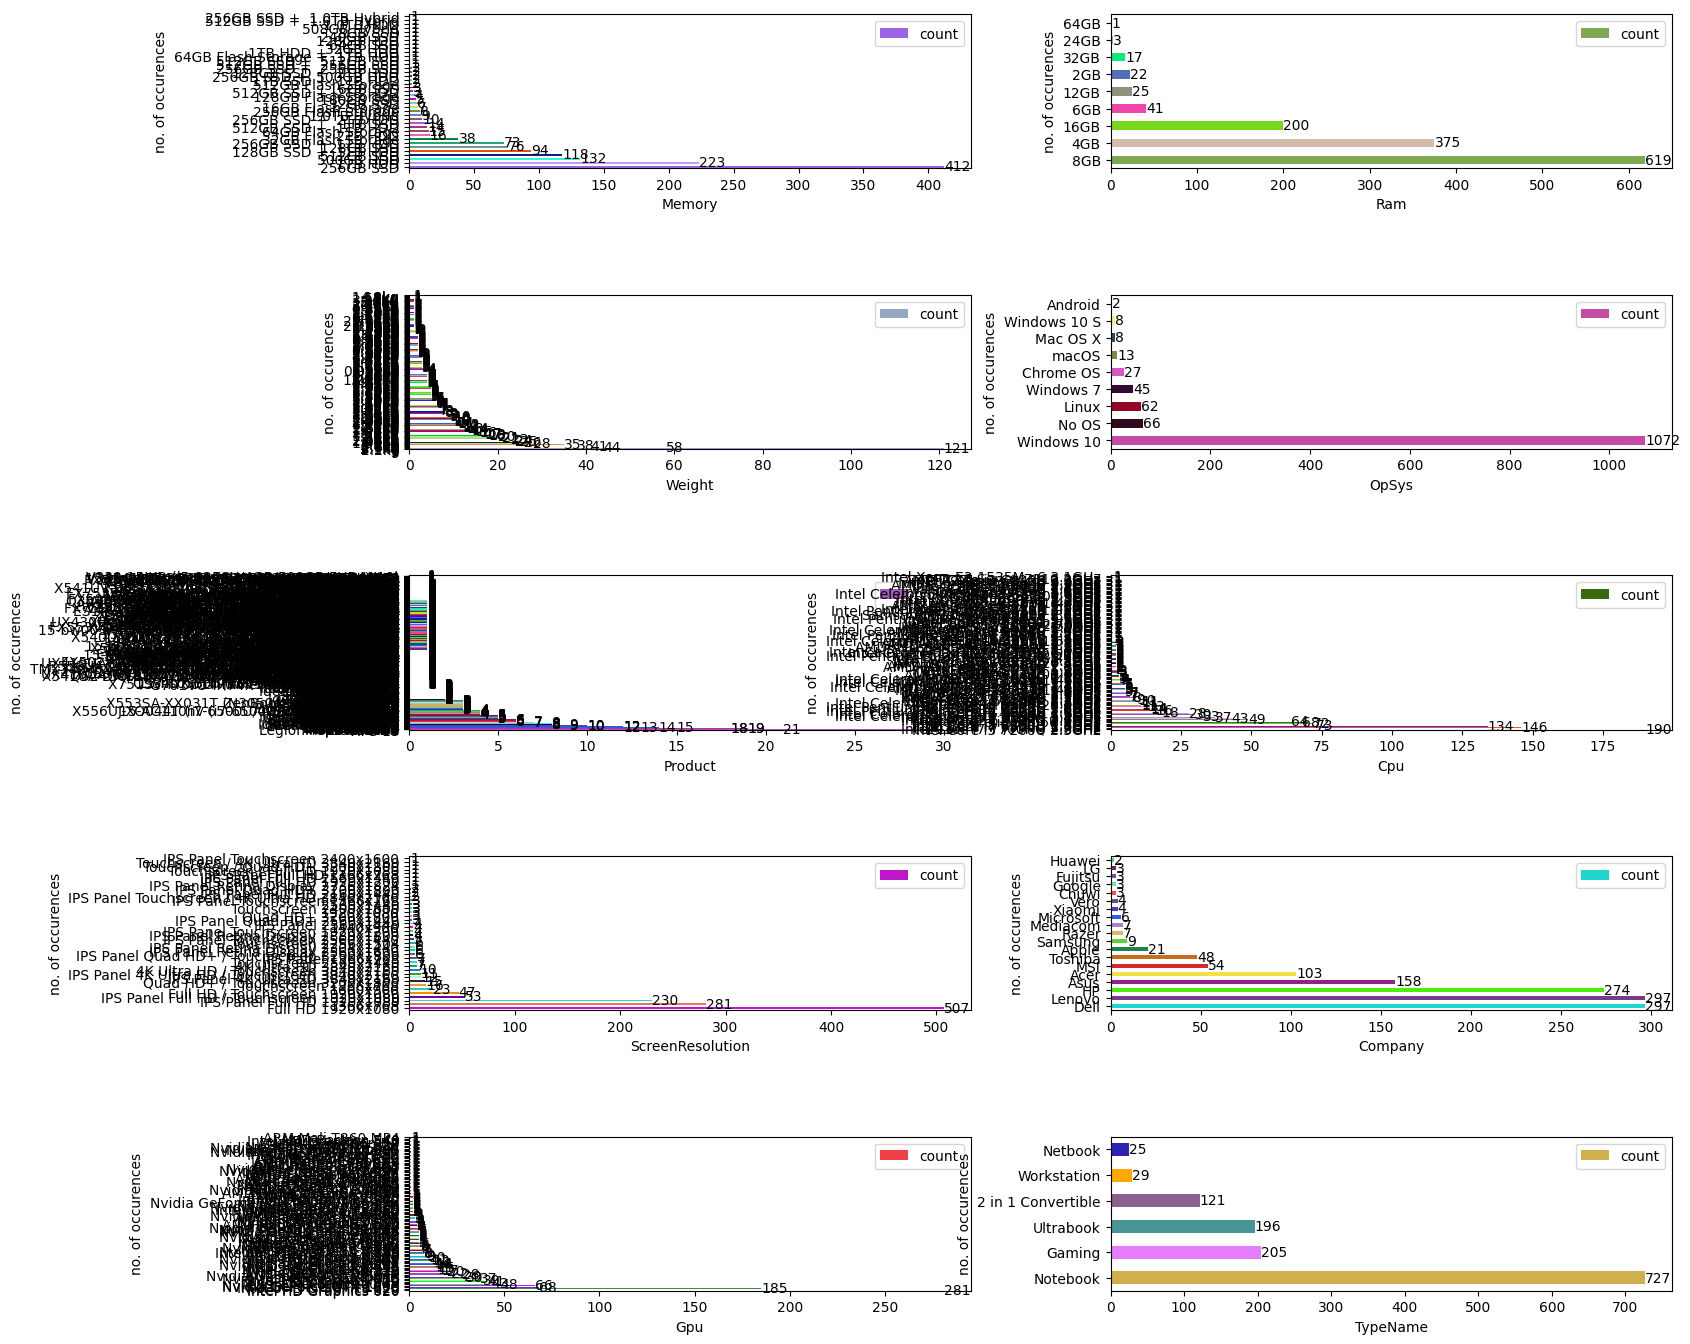

In [33]:
disp_cat_feat(lp_X, cat_cols, fig_dims=(len(cat_cols) // 2, 2))

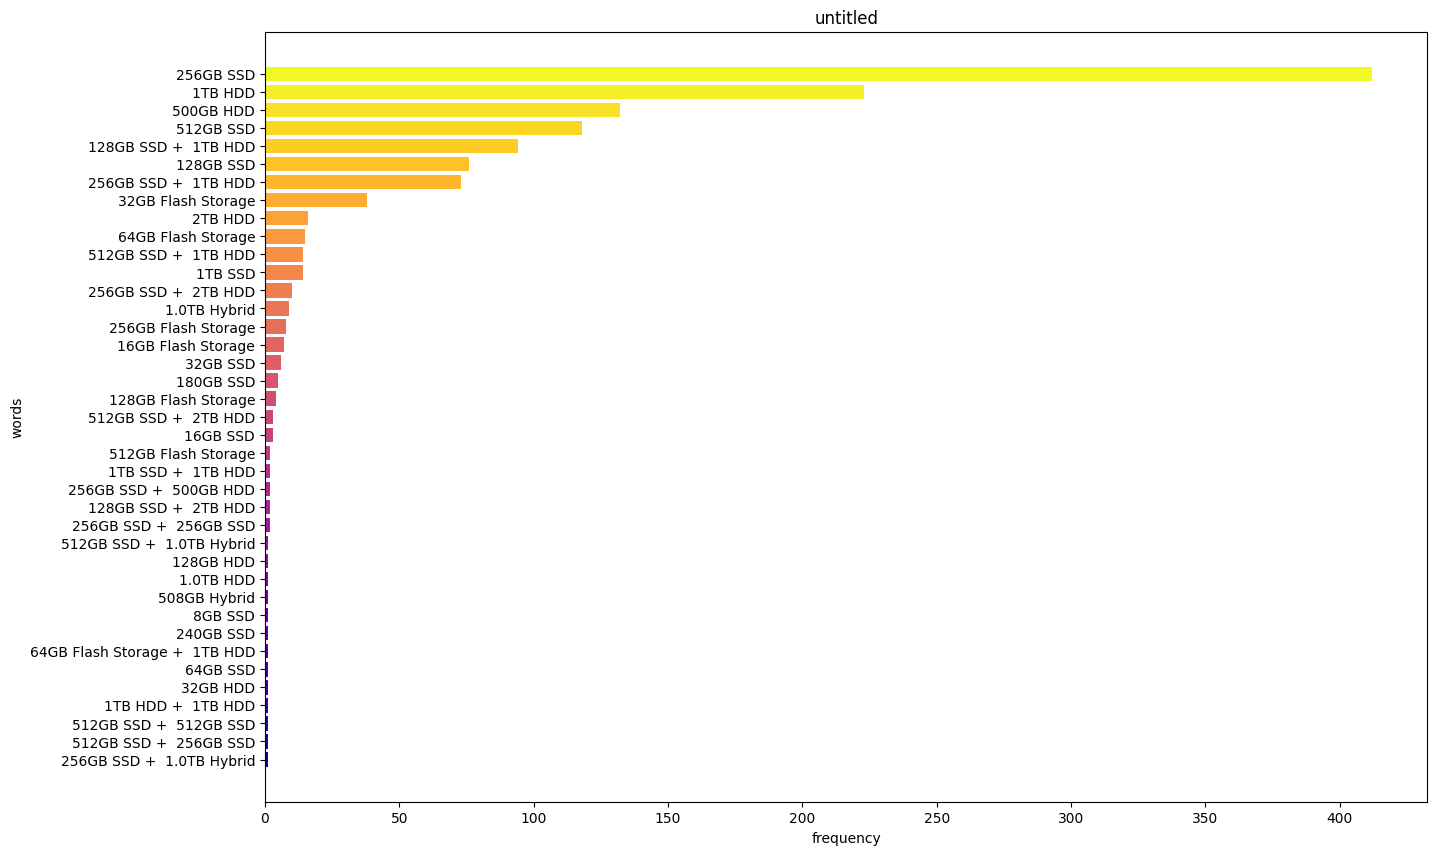

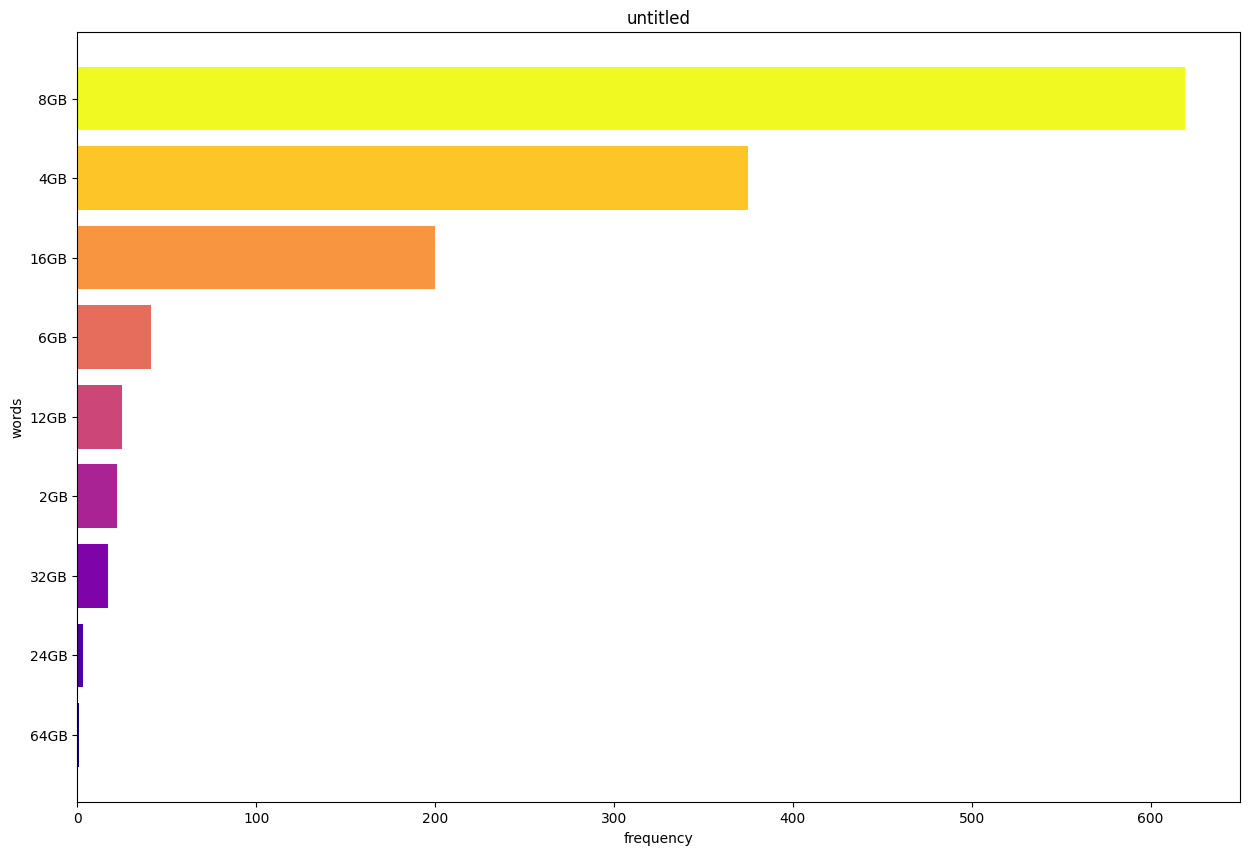

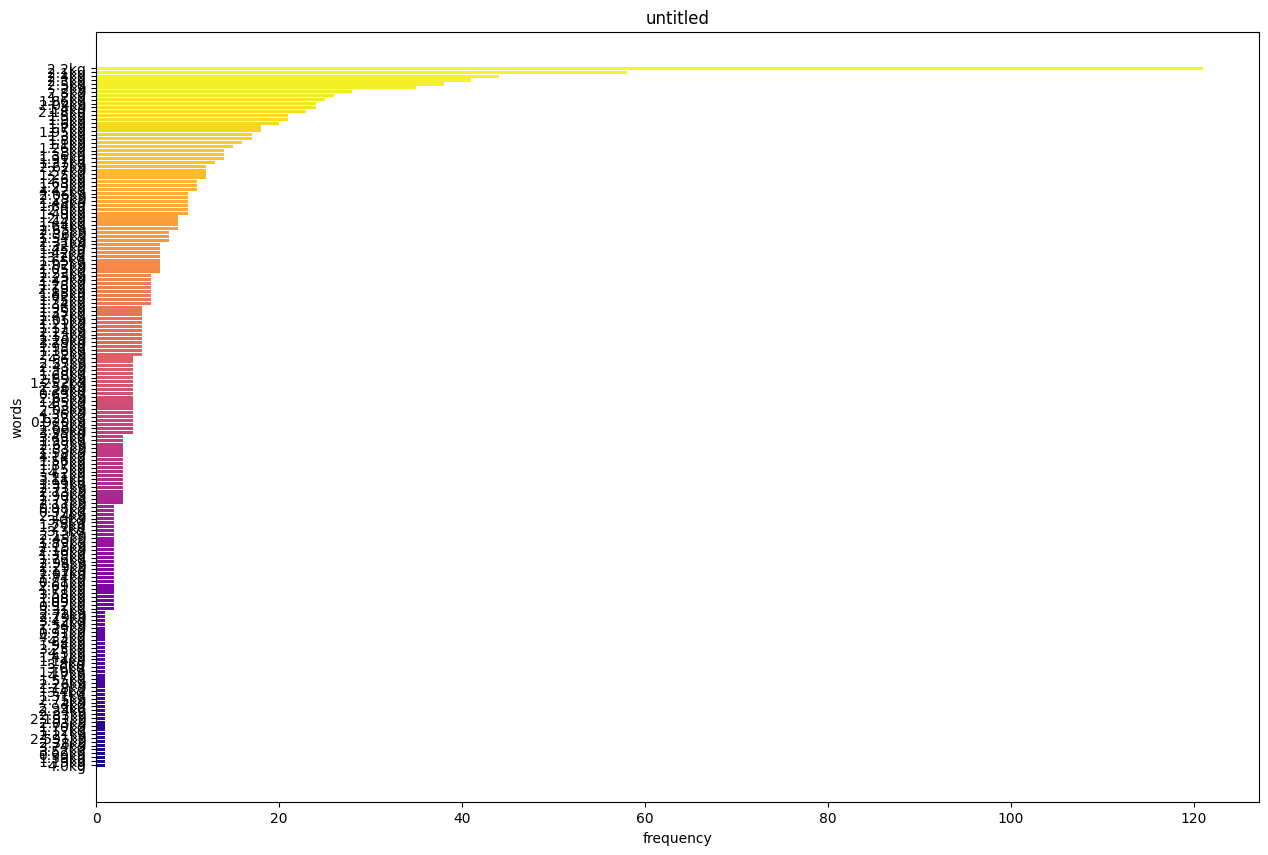

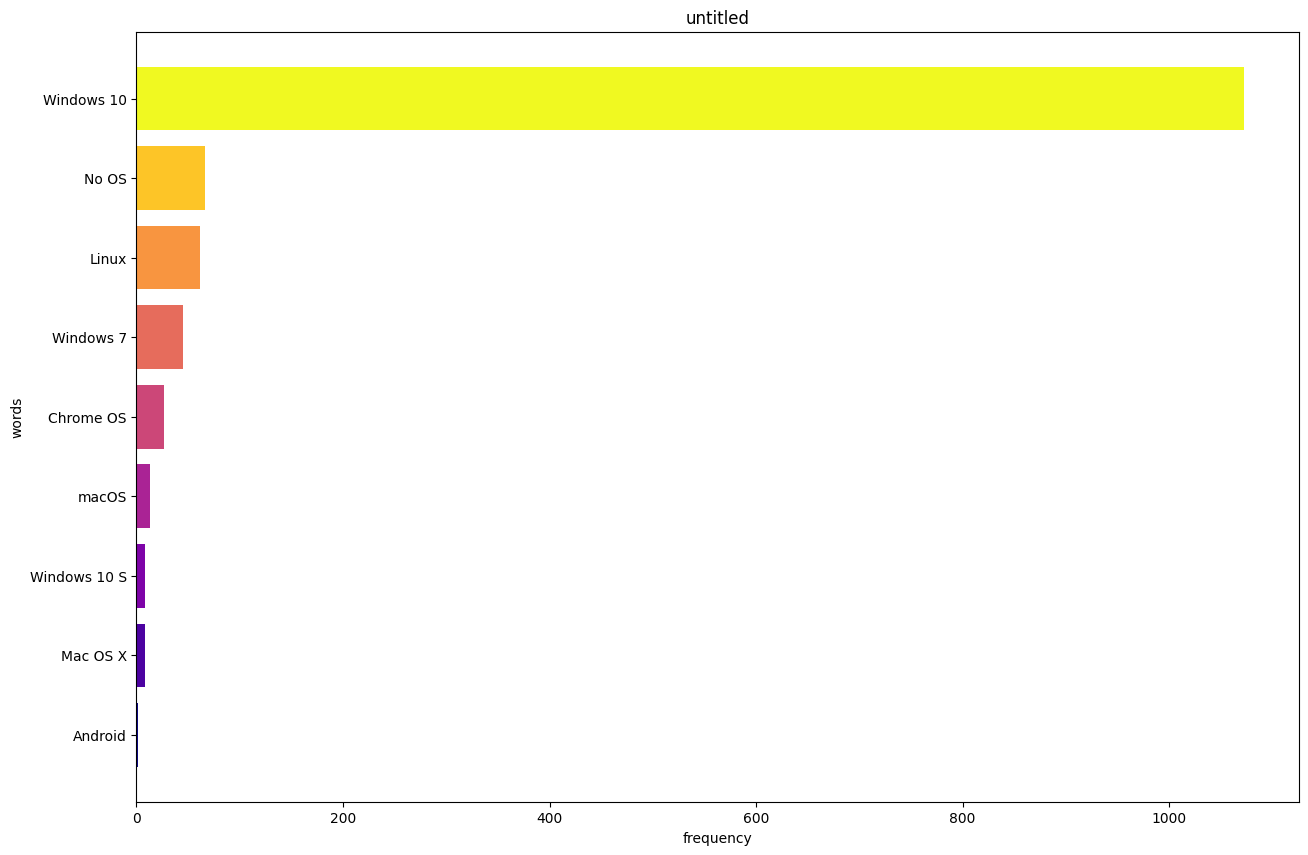

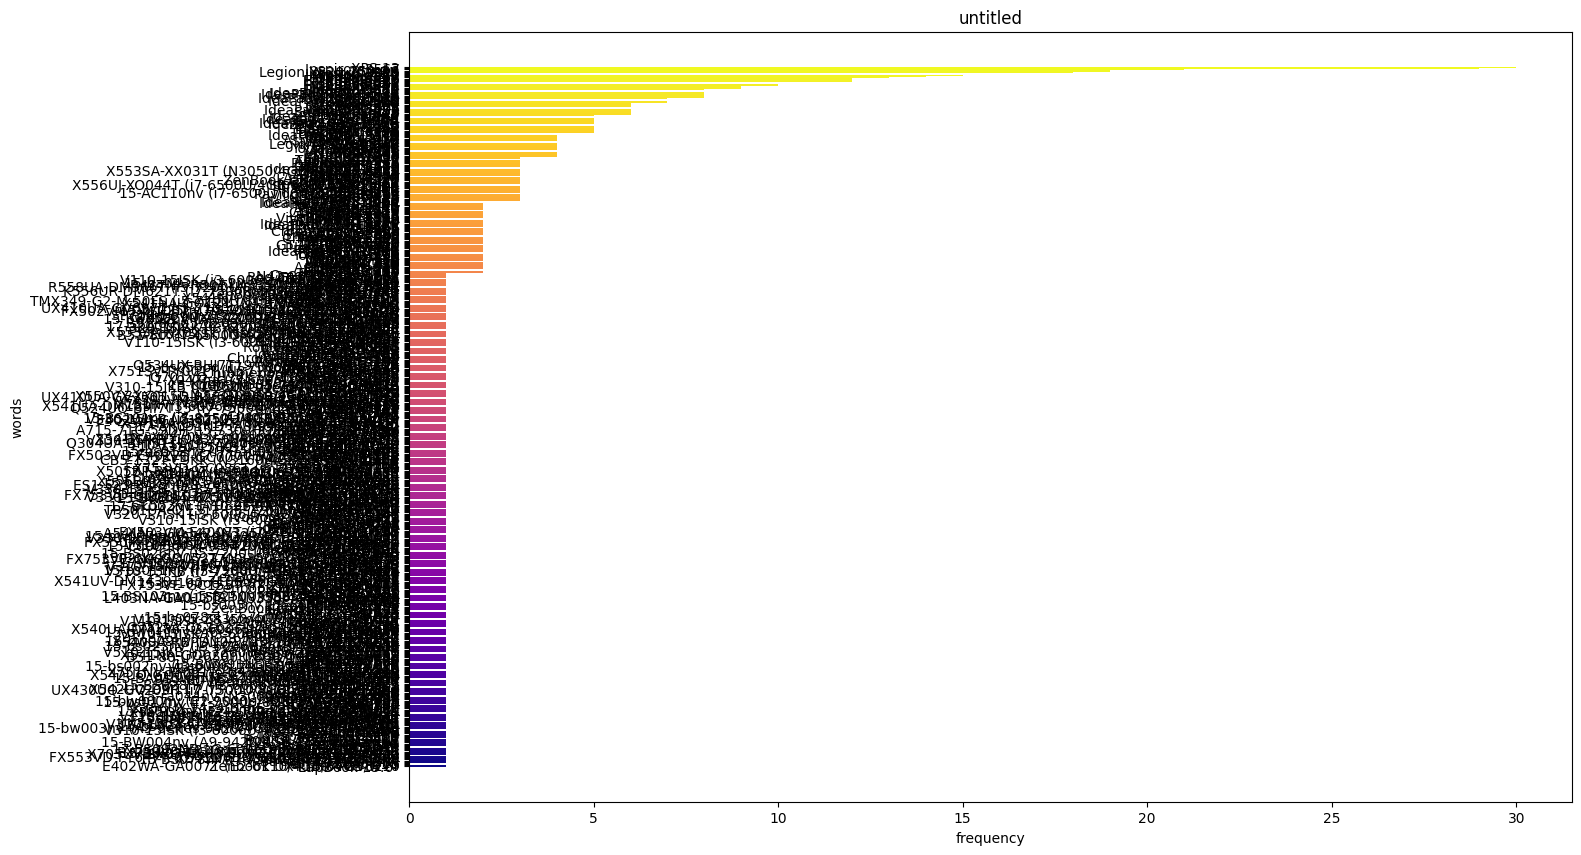

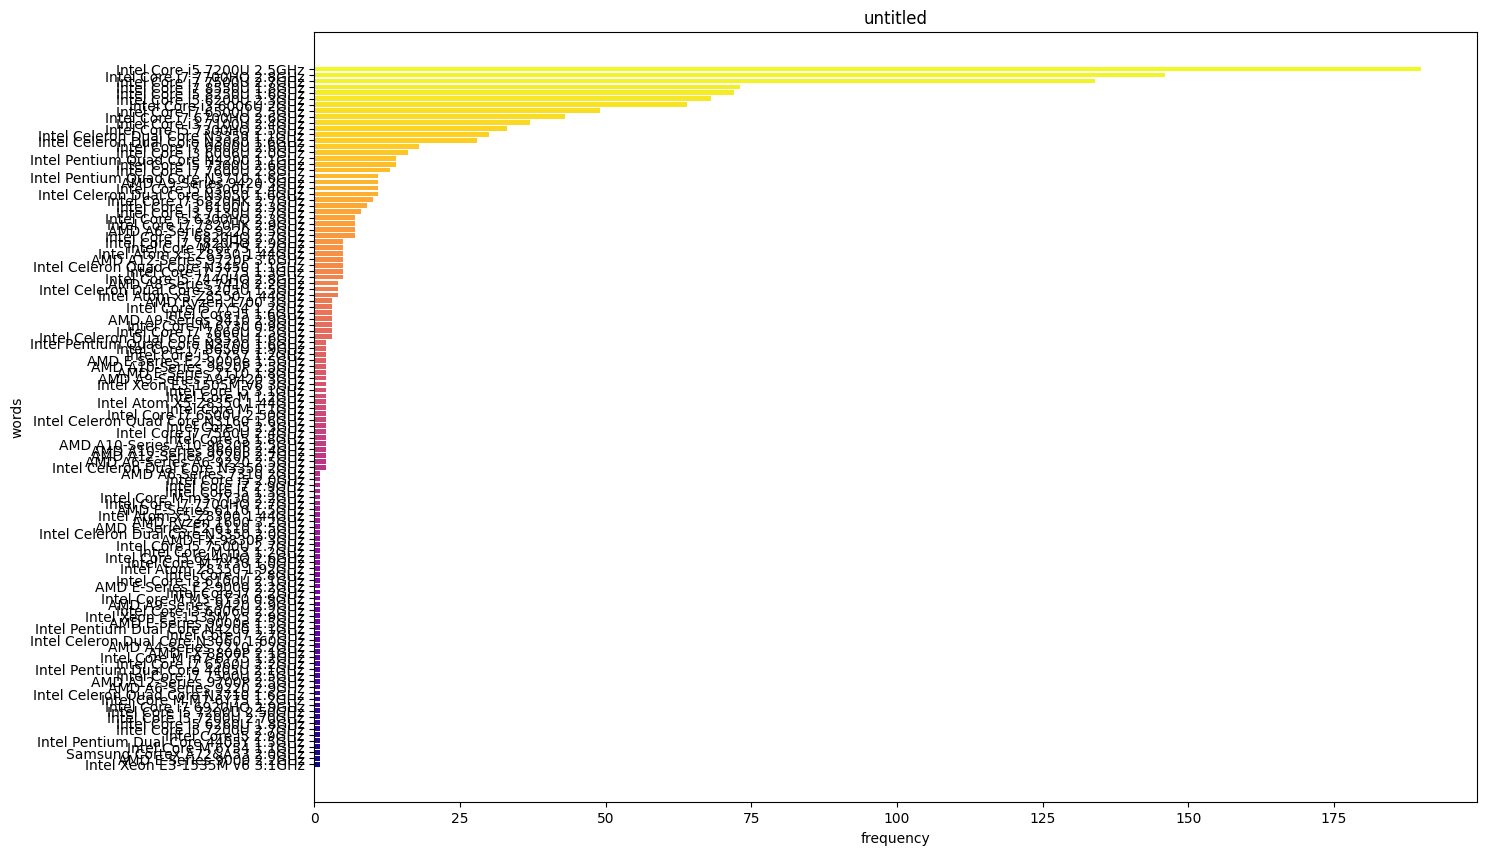

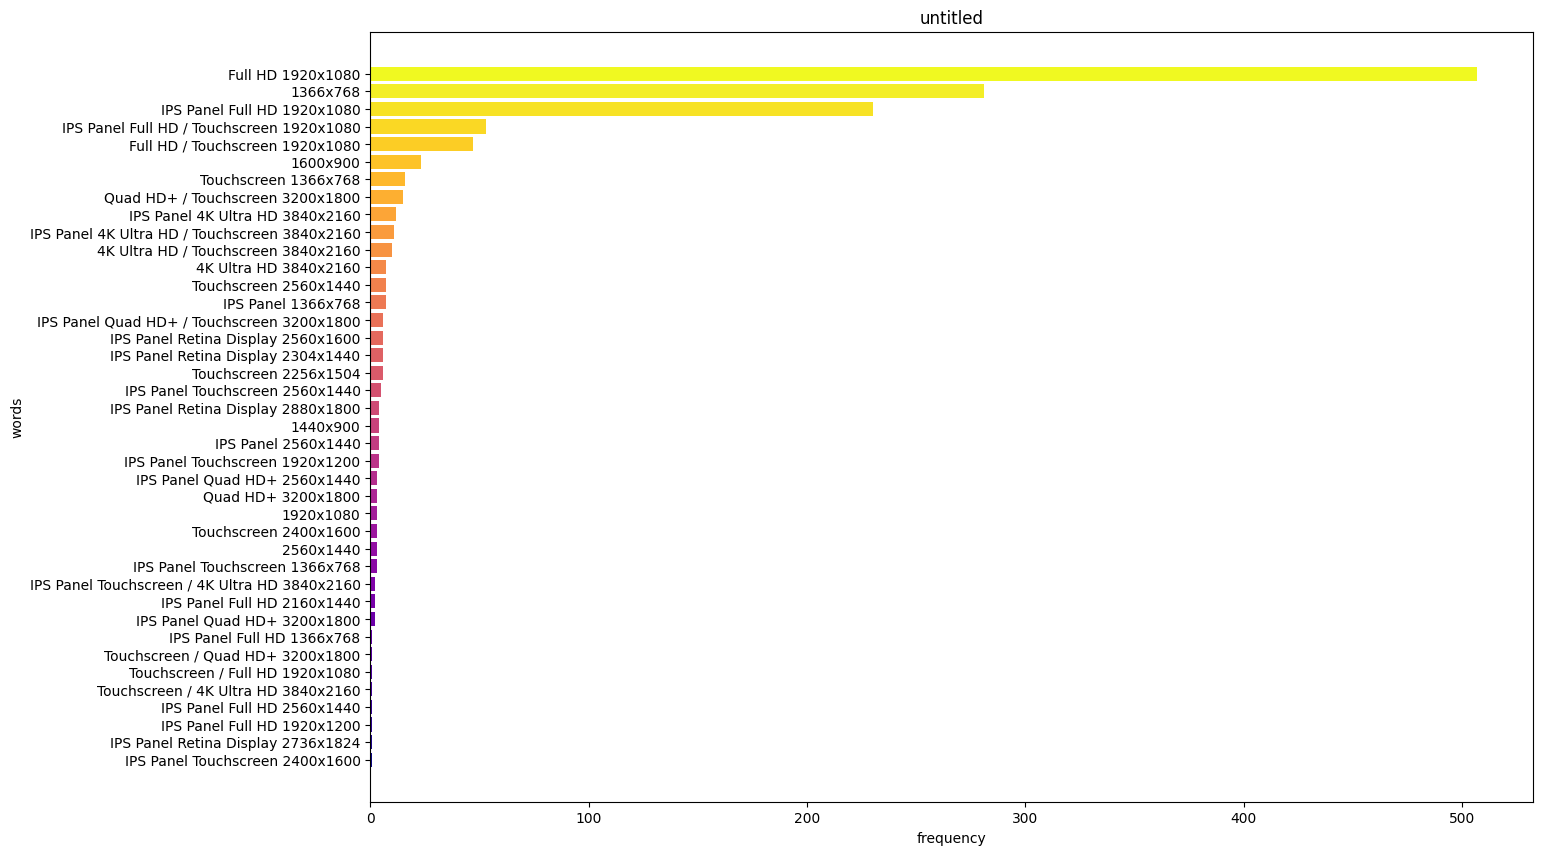

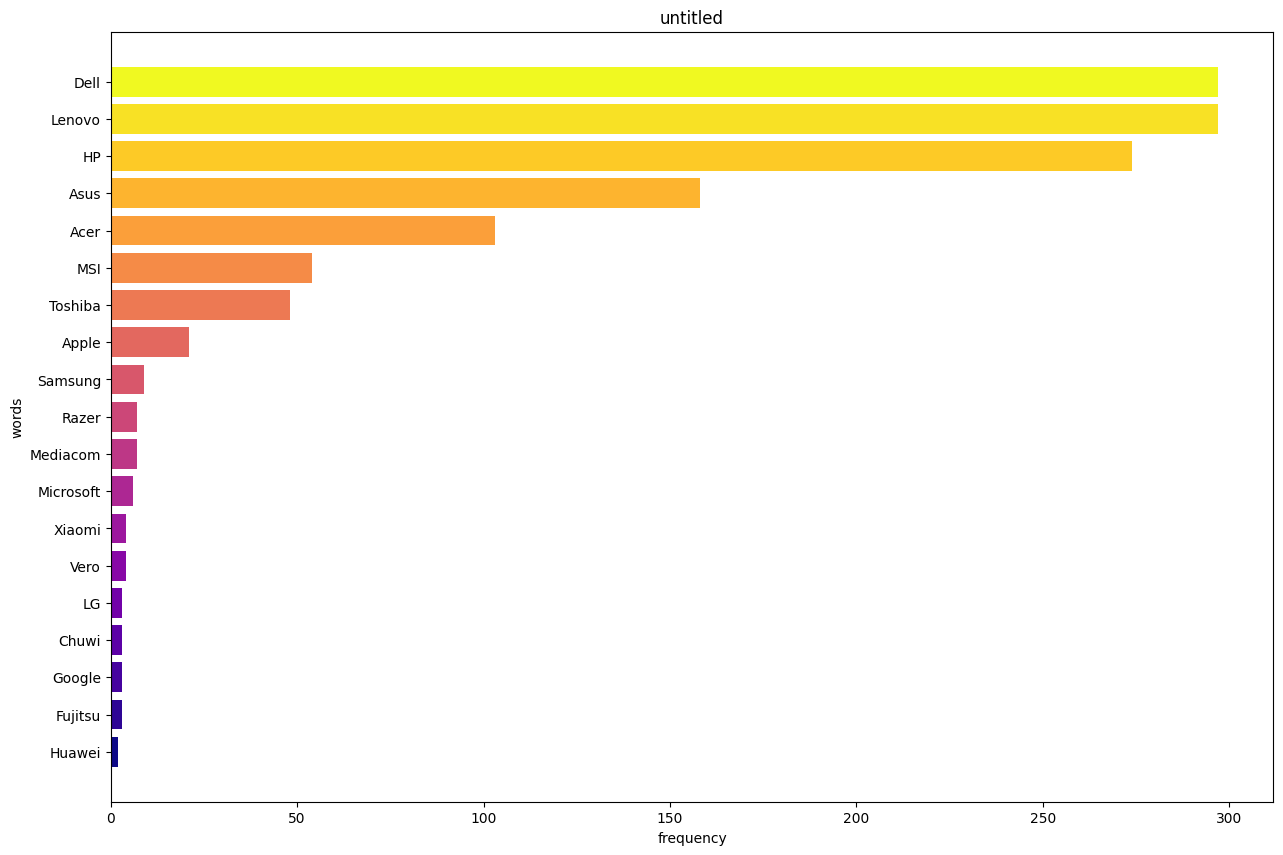

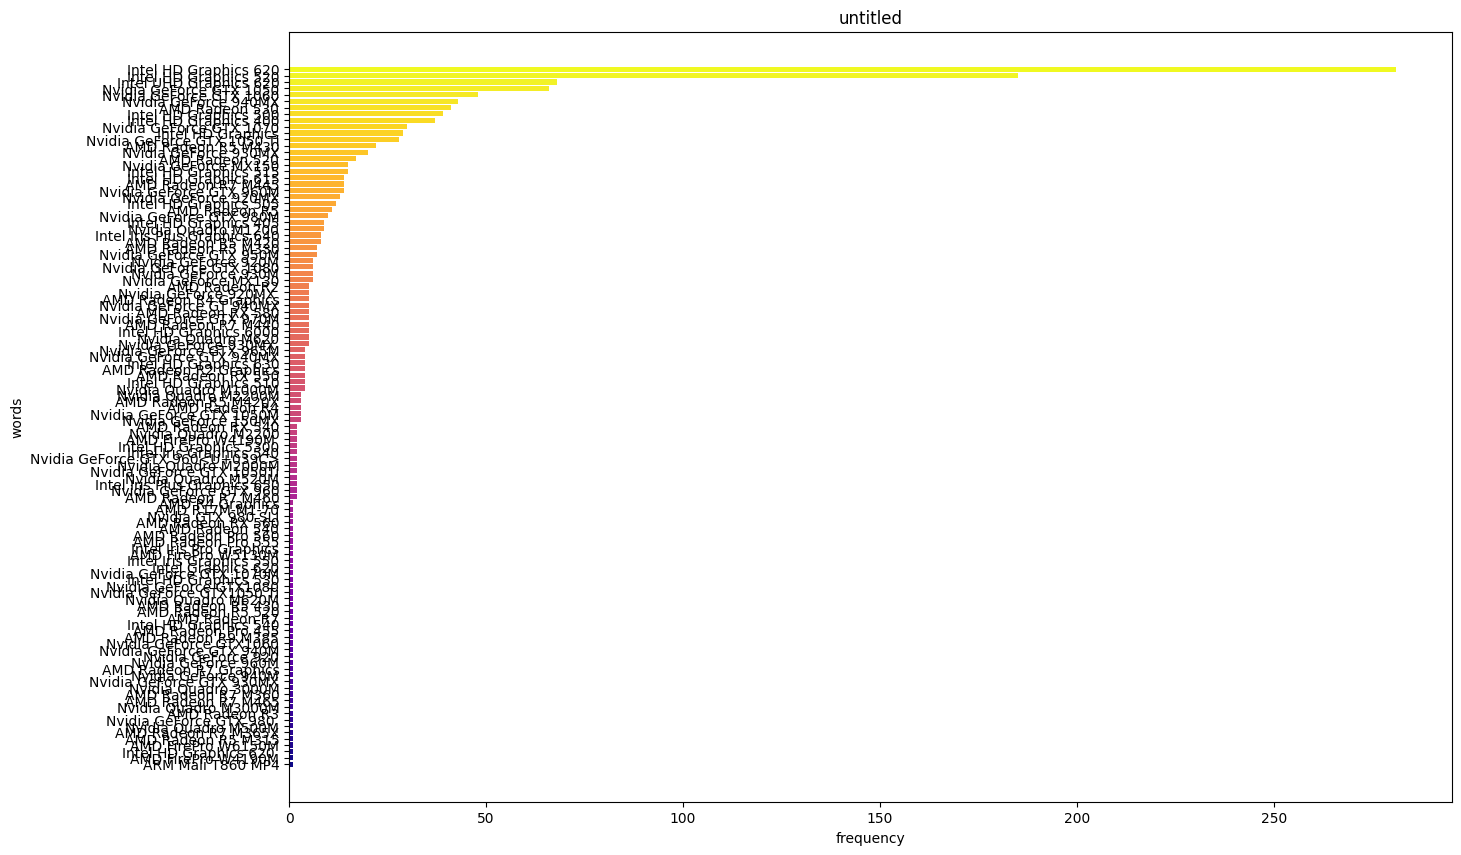

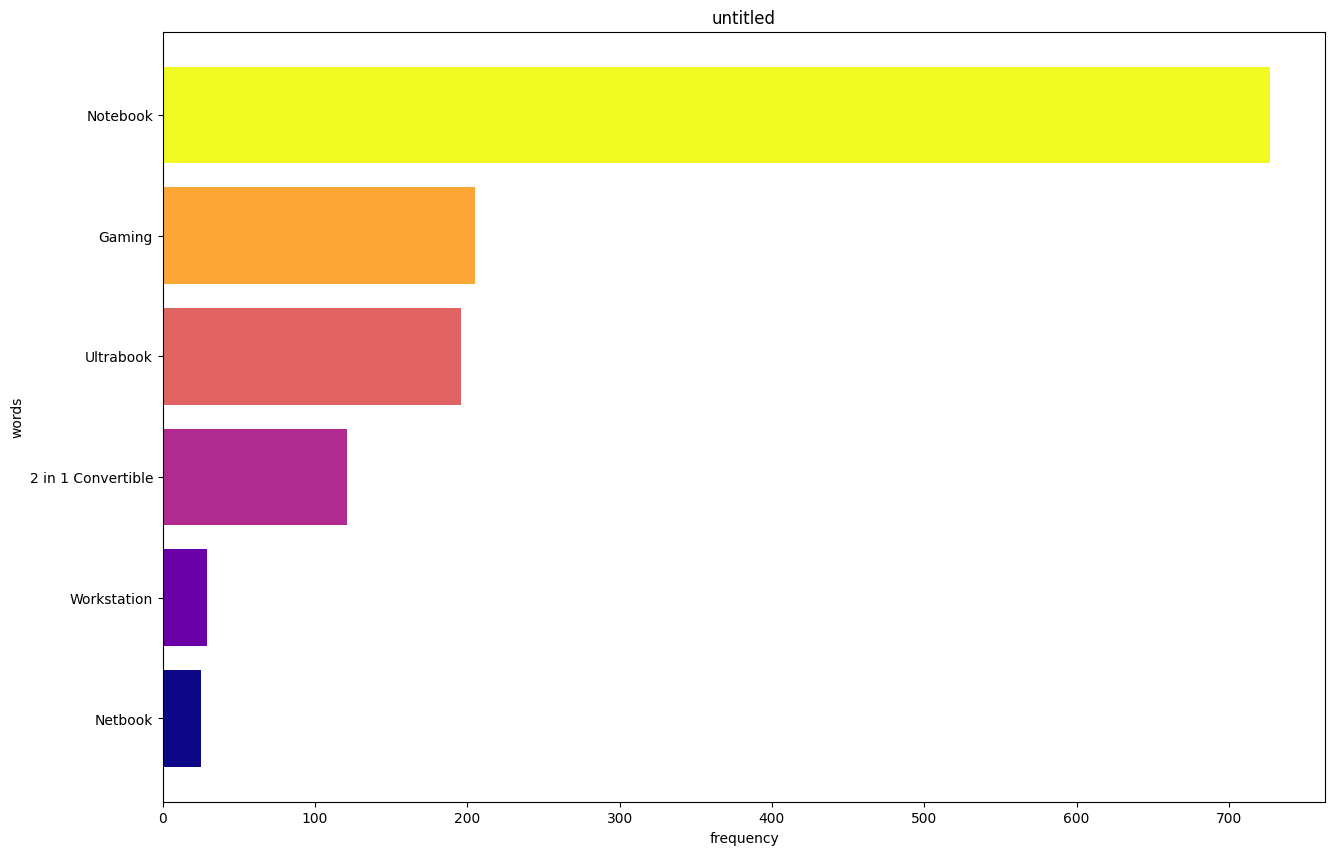

In [45]:
for cat_col in cat_cols:
    view_value_frequency(lp_X[cat_col].value_counts(), limit=lp_X[cat_col].unique().size)

d:\Projects\To Github\project-seraphim\server-side\modelling\utilities\visualizers.py:344: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis.set_title(img_title)


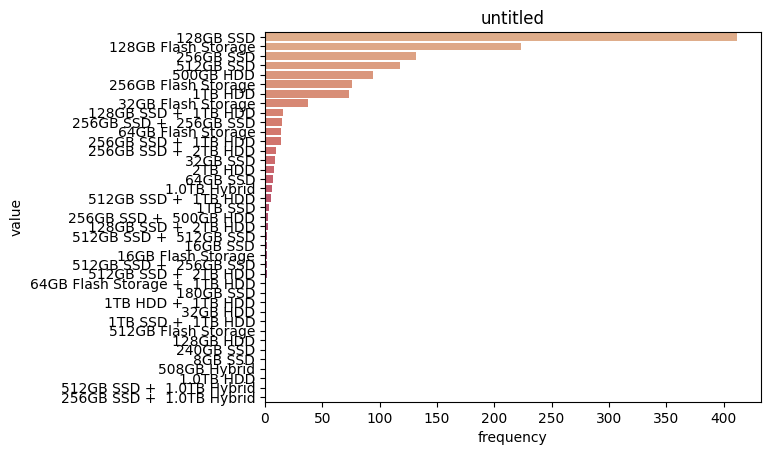

d:\Projects\To Github\project-seraphim\server-side\modelling\utilities\visualizers.py:344: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis.set_title(img_title)


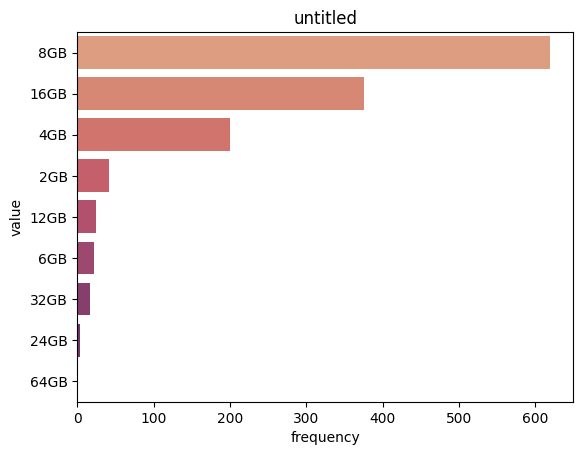

d:\Projects\To Github\project-seraphim\server-side\modelling\utilities\visualizers.py:344: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis.set_title(img_title)


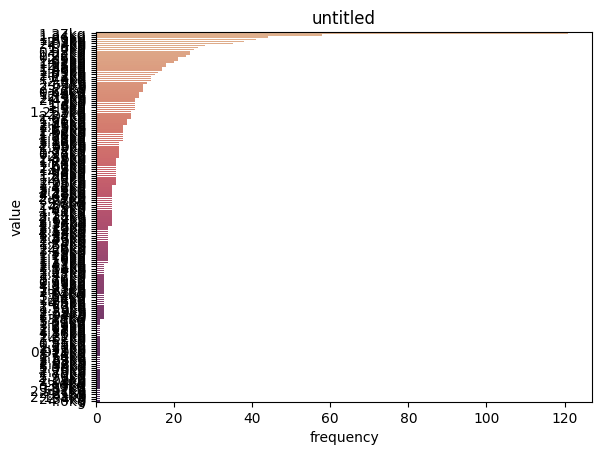

d:\Projects\To Github\project-seraphim\server-side\modelling\utilities\visualizers.py:344: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis.set_title(img_title)


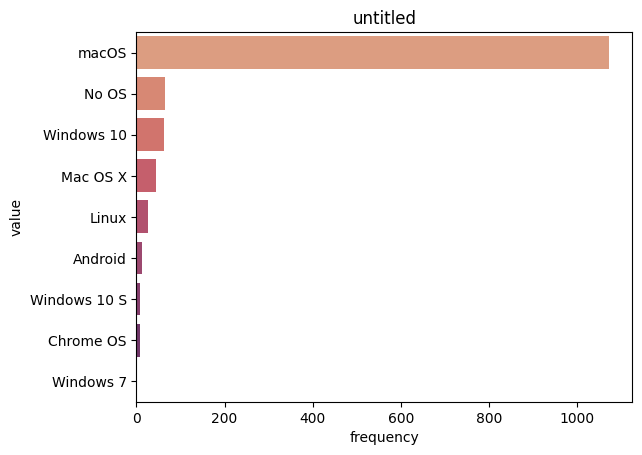

d:\Projects\To Github\project-seraphim\server-side\modelling\utilities\visualizers.py:344: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis.set_title(img_title)


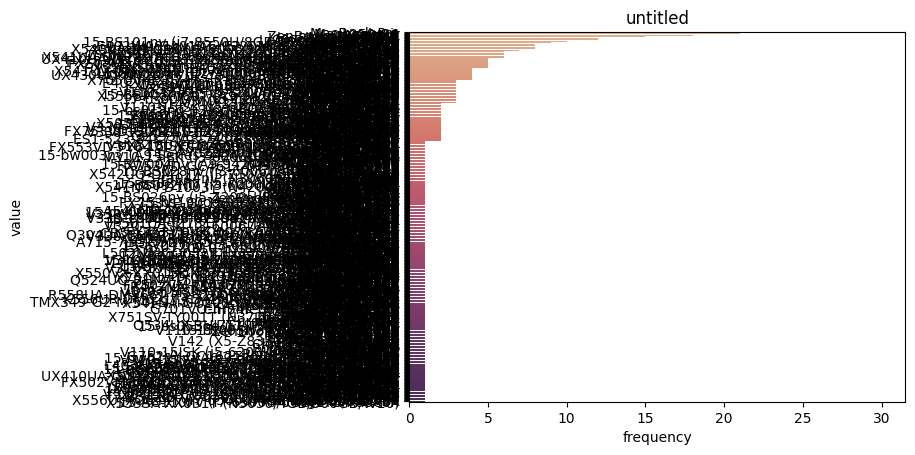

d:\Projects\To Github\project-seraphim\server-side\modelling\utilities\visualizers.py:344: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis.set_title(img_title)


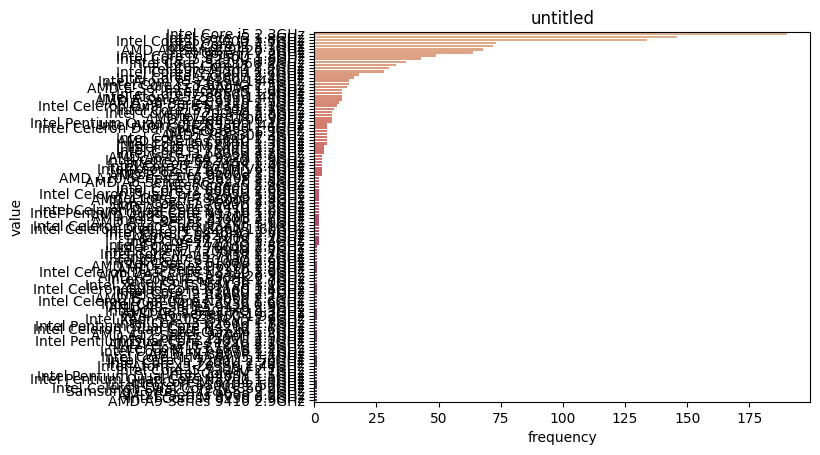

d:\Projects\To Github\project-seraphim\server-side\modelling\utilities\visualizers.py:344: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis.set_title(img_title)


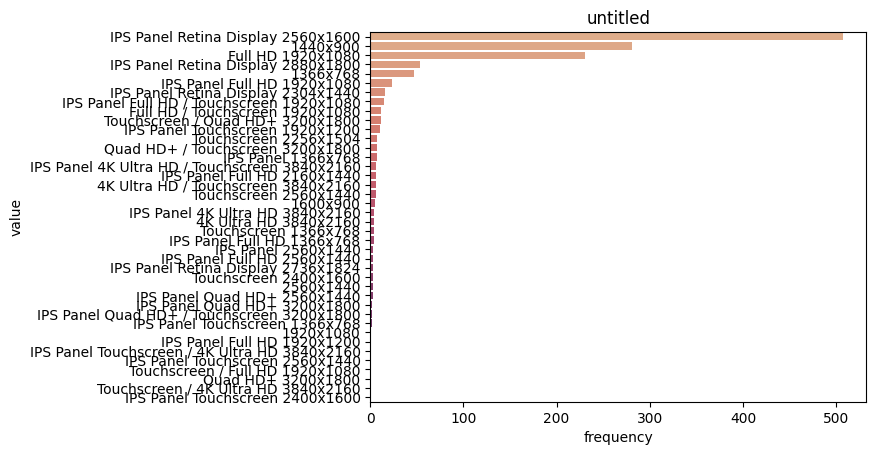

d:\Projects\To Github\project-seraphim\server-side\modelling\utilities\visualizers.py:344: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis.set_title(img_title)


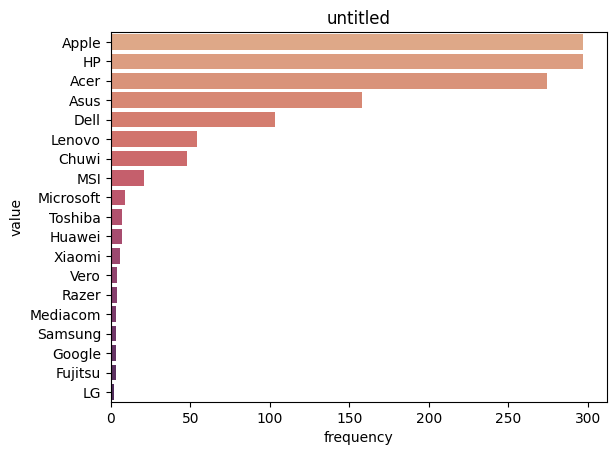

d:\Projects\To Github\project-seraphim\server-side\modelling\utilities\visualizers.py:344: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis.set_title(img_title)


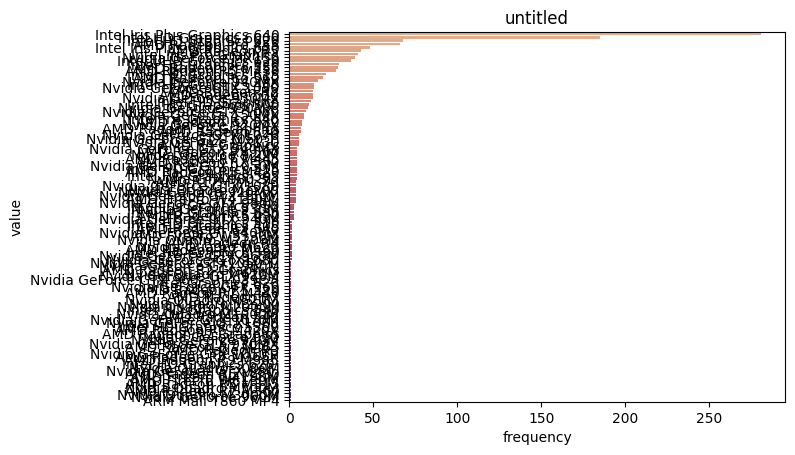

d:\Projects\To Github\project-seraphim\server-side\modelling\utilities\visualizers.py:344: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis.set_title(img_title)


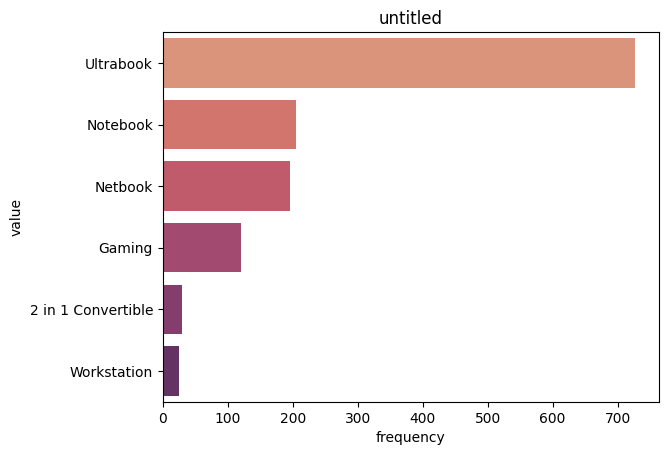

In [53]:
for cat_col in cat_cols:
    view_label_freq(lp_X[cat_col].value_counts(), labels=lp_X[cat_col].unique(), horizontal=True)

# Preprocessing

In [55]:
lp_X[cat_cols] = encode_features(cat_cols, lp_X)
lp_X

d:\Projects\To Github\project-seraphim\server-side\modelling\utilities\preprocessors.py:36: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  temp = MinMaxScaler() if scaler is 'min_max' else StandardScaler()
C:\Users\Mig\AppData\Local\Temp\ipykernel_9360\2470305067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lp_X[cat_cols] = encode_features(cat_cols, lp_X)


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,1,300,4,13.3,23,65,8,4,58,8,38
1,1,301,4,13.3,1,63,8,2,51,8,35
2,7,50,3,15.6,8,74,8,16,53,4,74
3,1,300,4,15.4,25,85,1,29,9,8,71
4,1,300,4,13.3,23,67,8,16,59,8,38
...,...,...,...,...,...,...,...,...,...,...,...
1298,10,580,0,14.0,13,89,5,4,47,5,78
1299,10,588,0,13.3,19,89,1,29,47,5,41
1300,10,196,3,14.0,0,34,3,35,40,5,56
1301,7,2,3,15.6,0,89,7,10,21,5,104


In [57]:
lp_X['Ram'].unique()

array([8, 1, 5, 3, 0, 7, 4, 2, 6], dtype=int64)

In [ ]:
lp_X_trains, lp_X_cross, lp_Y_trains, lp_Y_cross = train_test_split(lp_X, lp_Y, test_size=0.3, random_state=0)

# Regression

## Ensemble Modelling

In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn.linear_model import LinearRegression, PoissonRegressor, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR

In [ ]:
clf = LazyRegressor(
    verbose=0, 
    ignore_warnings=True, 
    custom_metric=None, 
    regressors=[LinearRegression, PoissonRegressor, Ridge, Lasso, DecisionTreeRegressor, RandomForestRegressor, XGBRegressor, SVR])
models_train, predictions_train = clf.fit(X_trains, X_trains, Y_trains, Y_trains)
models_test, predictions_test = clf.fit(X_trains, X_cross, Y_trains, Y_cross)

#### Here the output of the clf.fit() method that fits multiple different models is actually a dataframe containing all the multiple different models we have trained and their respective metric values like Adjusted R-squared, R-squared, RMSE, etc. that we can always access easily through indexing.

In [ ]:
# models_train

In [ ]:
# models_train.loc['XGBRegressor', :]

## Individual Modelling

### Linear Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Pipeline is akin to a Sequential class in tf where architecture of model is defined
from sklearn.pipeline import Pipeline

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
scaler = StandardScaler()
model = LinearRegression()

poly_model = Pipeline([
    ("engineered features", poly),
    ("input normalizer|standardizer", scaler),
    ("linear regression model", model),
])

poly_model.fit(X_trains, Y_trains)

# Classification

## Ensemble Modelling

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

## Individual Modelling

### Logistic Regression

### Decision Trees, Random Forests, Extreme Gradient Boosted

### Naive Bayes

### Support Vector Machine

# NLP

# Clustering

In [ ]:
from utilities.visualizers import plot_evolution
from sklearn.cluster import DBSCAN, KMeans

In [ ]:
# read unlabeled data
df = pd.read_csv('./data/E-commerce.csv')

# drop ID and profile information column column
df.drop(columns=['ID', 'profile_information'], inplace=True)
X = df.to_numpy()
K = 3
epochs = 300

In [ ]:
df

In [ ]:
X.shape

In [ ]:
k_means = KMeans(n_clusters=K, max_iter=1, random_state=0)
k_means.fit(X)
print(k_means.cluster_centers_)

In [ ]:
k_means = KMeans(n_clusters=K, max_iter=2, random_state=0)
k_means.fit(X)
print(k_means.cluster_centers_)

In [ ]:
k_means = KMeans(n_clusters=K, max_iter=1, random_state=0)
k_means.fit(X)
print(k_means.cluster_centers_)

In [ ]:
prev_centroids = []
for epoch in range(1, 300 + 1):
    k_means = KMeans(n_clusters=K, max_iter=epoch, random_state=0)
    k_means.fit(X)
    prev_centroids.append(k_means.cluster_centers_)
prev_centroids = np.array(prev_centroids)

In [ ]:
len(prev_centroids)

In [ ]:
xs_centroids = k_means.predict(X)

In [ ]:
np.unique(xs_centroids, return_counts=True)

In [ ]:
plot_evolution(X, K, prev_centroids, xs_centroids, features=['n_clicks', 'n_visits', 'amount_spent'], dimension='3d')